<a href="https://colab.research.google.com/github/rr4323/data_scientist_mastry/blob/main/life_expectancy_prediction/life_expectancy_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Create an end-to-end project in Jupyter/Colab to predict life expectancy using the dataset from "https://www.kaggle.com/code/ranasabrii/life-expectancy-regression-with-ann/notebook". The project should include data loading, EDA, data preprocessing (handling distributions, skewness, outliers, and scaling), building and training a deep learning ANN model with multiple hidden layers, applying dropout regularization and early stopping, using ModelCheckpoint, tuning hyperparameters with KerasTuner, comparing model accuracies, and finalizing the best model.

## Data loading and initial inspection

### Subtask:
Download the dataset from the Kaggle link and load it into a pandas DataFrame. Perform initial inspection of the data, including checking the data types, missing values, and basic statistics.


**Reasoning**:
Download the dataset from the provided Kaggle link, load it into a pandas DataFrame, and perform an initial inspection including displaying the head, info, and descriptive statistics.



In [1]:
%pip install opendatasets


In [2]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import plot_model #for model visualization

In [3]:
import pandas as pd
import opendatasets as od

# Download the dataset using opendatasets
od.download("https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who/download?datasetVersionNumber=1")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: rr4323
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who


100%|██████████| 119k/119k [00:00<00:00, 292MB/s]

In [4]:
import pandas as pd

import os

# Load the dataset into a pandas DataFrame
df = pd.read_csv('/content/life-expectancy-who/Life Expectancy Data.csv')

# Display the first few rows
display(df.head())

# Display data types and non-null counts
display(df.info())

# Display descriptive statistics
display(df.describe())

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

None

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


## Exploratory Data Analysis (EDA) and Visualization

### Subtask:
Conduct EDA to understand the data distribution, relationships between variables, and identify potential issues. Create visualizations to support the analysis.

**Reasoning**:
Perform exploratory data analysis to understand the data, including checking the distribution of the target variable, the relationship between the target variable and other features, and visualizing these relationships using appropriate plots.

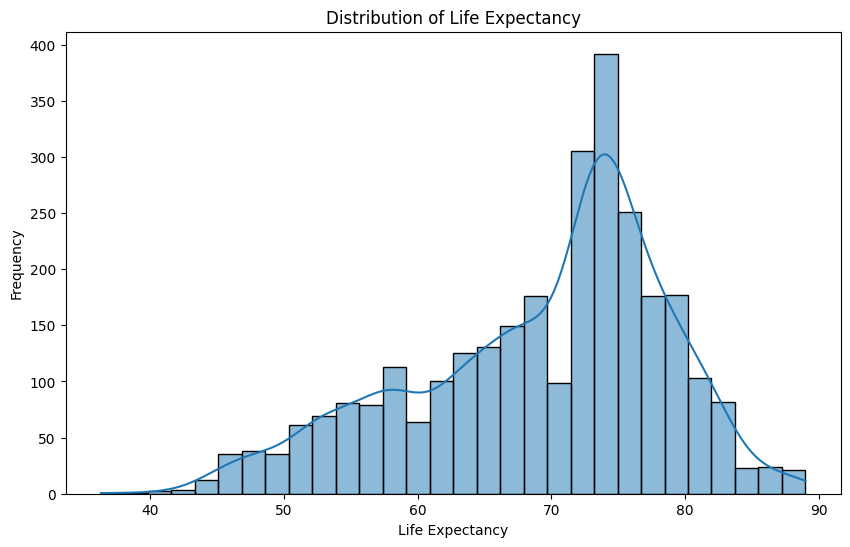

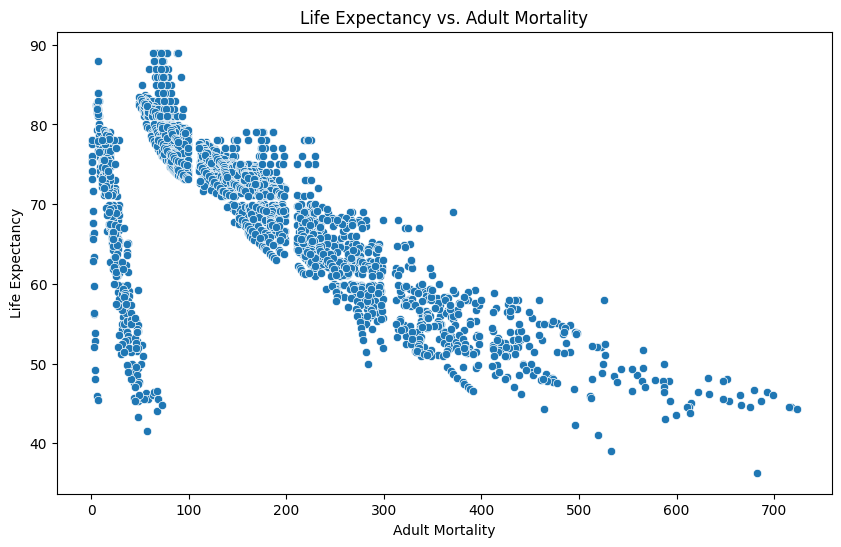

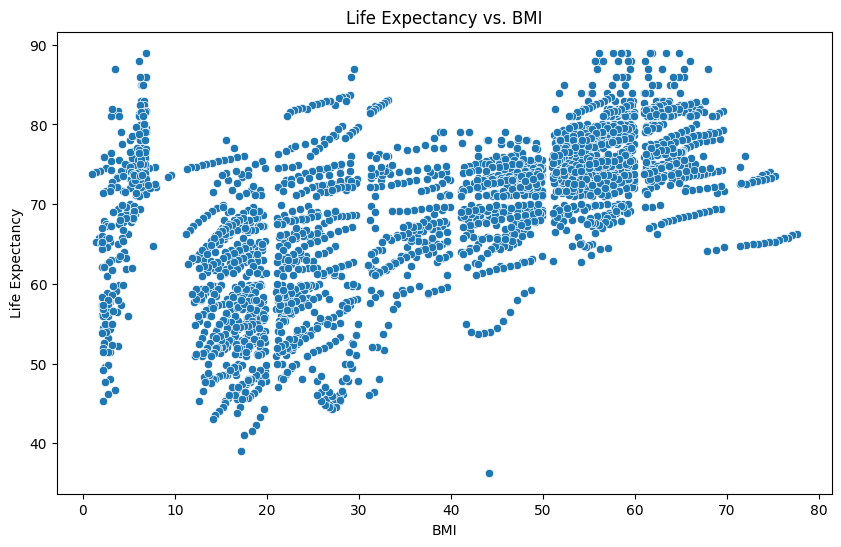

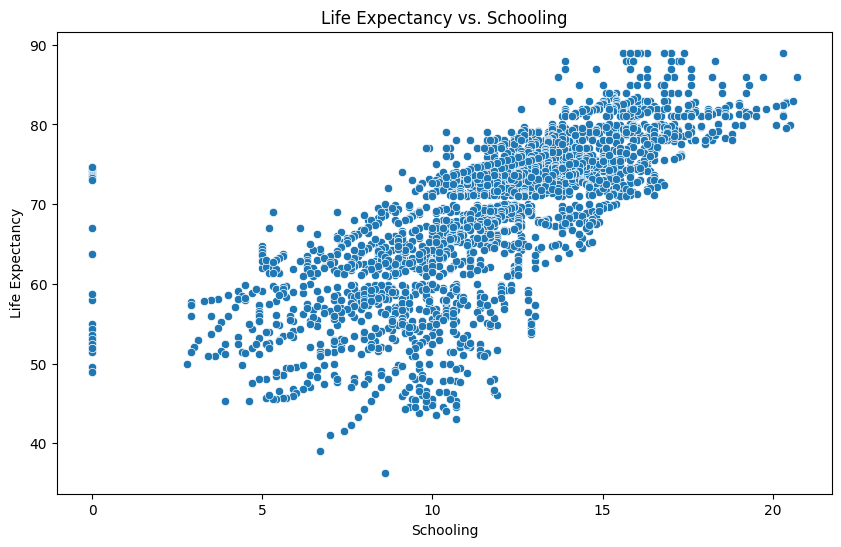

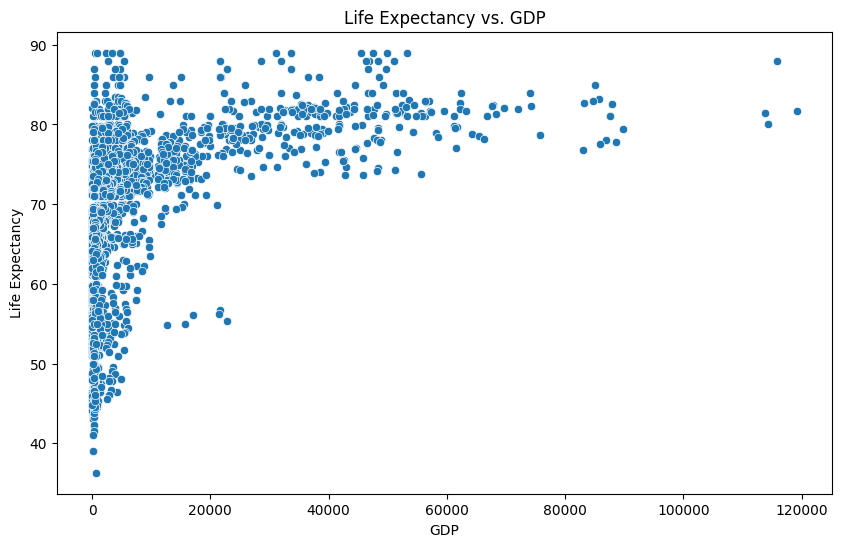

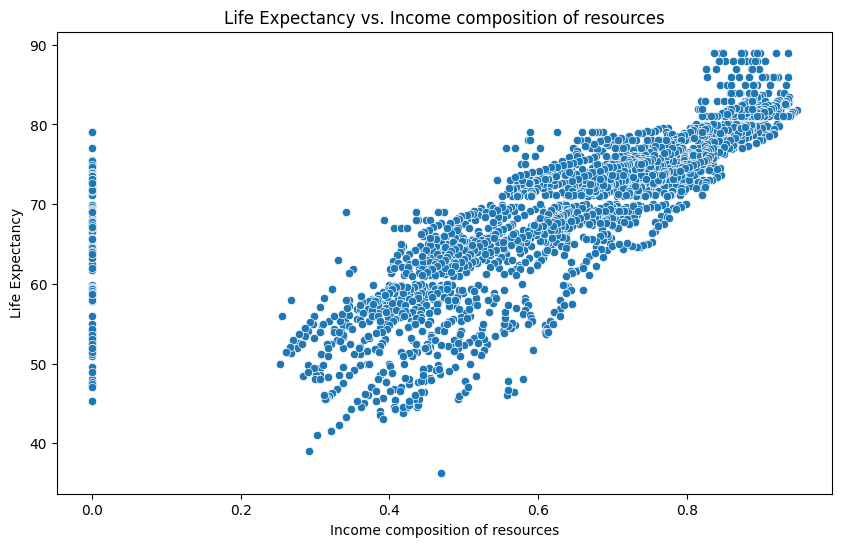

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check the distribution of the target variable 'Life expectancy'
plt.figure(figsize=(10, 6))
sns.histplot(df['Life expectancy '], kde=True)
plt.title('Distribution of Life Expectancy')
plt.xlabel('Life Expectancy')
plt.ylabel('Frequency')
plt.show()

# Explore the relationship between 'Life expectancy' and 'Adult Mortality'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Adult Mortality', y='Life expectancy ', data=df)
plt.title('Life Expectancy vs. Adult Mortality')
plt.xlabel('Adult Mortality')
plt.ylabel('Life Expectancy')
plt.show()

# Explore the relationship between 'Life expectancy' and 'BMI'
plt.figure(figsize=(10, 6))
sns.scatterplot(x=' BMI ', y='Life expectancy ', data=df)
plt.title('Life Expectancy vs. BMI')
plt.xlabel('BMI')
plt.ylabel('Life Expectancy')
plt.show()

# Explore the relationship between 'Life expectancy' and 'Schooling'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Schooling', y='Life expectancy ', data=df)
plt.title('Life Expectancy vs. Schooling')
plt.xlabel('Schooling')
plt.ylabel('Life Expectancy')
plt.show()

# Explore the relationship between 'Life expectancy' and 'GDP'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='GDP', y='Life expectancy ', data=df)
plt.title('Life Expectancy vs. GDP')
plt.xlabel('GDP')
plt.ylabel('Life Expectancy')
plt.show()

# Explore the relationship between 'Life expectancy' and 'Income composition of resources'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Income composition of resources', y='Life expectancy ', data=df)
plt.title('Life Expectancy vs. Income composition of resources')
plt.xlabel('Income composition of resources')
plt.ylabel('Life Expectancy')
plt.show()

## Data Preprocessing

### Subtask:
Handle missing values, check for skewness and apply transformations if necessary. Identify and treat outliers. Perform feature scaling.

**Reasoning**:
Handle missing values by checking for nulls and deciding on an imputation strategy. Check for skewness in numerical features and apply transformations if needed. Identify and treat outliers. Finally, scale the numerical features.

In [6]:
df.columns


Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [7]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [8]:
# Loop through each column and create a box plot
for column in df.columns:
    fig = px.box(df, y=column, title=f'Box Plot for {column}')

    # Update layout to center the title and make it bold
    fig.update_layout(
        title=dict(text=f'<b>Box Plot for {column}</b>', x=0.5),
        boxmode='group'
    )

    fig.show()

In [9]:


#using plotly draw line plot to show the trend of life expectancy over the years
fig = px.line(df.sort_values(by='Year'), x='Year', y='Life expectancy ',animation_frame='Country',animation_group='Year',color='Country', title='Trend of Life Expectancy Over the Years')

#update layout to center the title and make it bold
fig.update_layout(
    title=dict(text='<b>Trend of Life Expectancy Over the Years</b>', x=0.5)
)

fig.show()



In [10]:
#using plotly draw count plot for df['Status'] and color each bar with different color
fig = px.histogram(df, x='Status', color='Status', title='Count Plot for Status of Country')

#update layout to center the title and make it bold
fig.update_layout(
    title=dict(text='<b>Count Plot for Status of Country</b>', x=0.5)
)

fig.show()

In [11]:
# Filter DataFrame for 'Developing' status
developing_df = df[df['Status'] == 'Developing']

# Create a histogram
fig = px.histogram(developing_df, x='Life expectancy ', title="Life Expectancy of Developing Nations")
fig.update_layout(
    xaxis_title='',
    yaxis_title='Count of Ages',
    title_text='<b>Life Expectancy of Developing Countries</b>',
    title_x=0.5,  # Center title
)
fig.show()

In [12]:
# Filter DataFrame for 'Developing' status
developing_df = df[df['Status'] == 'Developed']

# Create a histogram
fig = px.histogram(developing_df, x='Life expectancy ', title="Life Expectancy of Developing Nations")
fig.update_layout(
    xaxis_title='',
    yaxis_title='Count of Ages',
    title_text='<b>Life Expectancy of Developed Countries</b>',
    title_x=0.5,  # Center title
)
fig.show()


In [13]:
#using plotly to visualize Average Adult Mortality of Developing and Developed Countries
fig = px.bar(df.groupby('Status', as_index=False).agg({'Adult Mortality':'mean'}),
             x='Status',
             y='Adult Mortality',
             color='Status',
             title='Average Adult Mortality of Developing and Developed Countries')

# Update layout to center the title
fig.update_layout(title_text='<b>Average Adult Mortality of Developing and Developed Countries</b>', title_x=0.5)

# Show the plot
fig.show()

In [14]:
#using plotly to visualize Average Infant deaths of Developing and Developed Countries
fig = px.bar(df.groupby('Status', as_index=False).agg({'infant deaths':'mean'}),
             x='Status',
             y='infant deaths',
             color='Status',
             title='Average Infant deaths of Developing and Developed Countries')

# Update layout to center the title
fig.update_layout(title_text='<b>Average Infant deaths of Developing and Developed Countries</b>', title_x=0.5)

# Show the plot
fig.show()

In [15]:
#using plotly to visualize Average Alcohol consumption of Developing and Developed Countries
fig = px.bar(df.groupby('Status', as_index=False).agg({'Alcohol':'mean'}),
             x='Status',
             y='Alcohol',
             color='Status',
             title='Average Alcohol consumption of Developing and Developed Countries')

# Update layout to center the title
fig.update_layout(title_text='<b>Average Alcohol consumption of Developing and Developed Countries</b>', title_x=0.5)

# Show the plot
fig.show()

In [16]:
# Check for missing values
print("Missing values before handling:")
print(df.isnull().sum())

# Handle missing values: Impute with the mean for numerical columns
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    if df[col].isnull().any():
        df[col].fillna(df[col].mean(), inplace=True)

# Check missing values after imputation
print("\nMissing values after handling:")
print(df.isnull().sum())

Missing values before handling:
Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

Missing values after handling:
Country                            0
Year                        

/tmp/ipython-input-3546377039.py:8: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





**Reasoning**:
Address categorical features by using one-hot encoding.

In [17]:
# Columns to apply label encoding
cols_to_encode = ['Country', 'Status']

# Apply label encoding to X
label_encoder_df = LabelEncoder()
for col in cols_to_encode:
    df[col] = label_encoder_df.fit_transform(df[col])
display(df.head())

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,0,2015,1,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,0,2014,1,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,0,2013,1,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,0,2012,1,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,0,2011,1,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


**Reasoning**:
Check for skewness in numerical features and apply transformations if necessary. For simplicity at this stage, we will identify highly skewed features and consider transformations if needed after initial model building.

In [18]:
# Check skewness for numerical columns
skewness = df.select_dtypes(include=['float64', 'int64']).skew().sort_values(ascending=False)
print("\nSkewness of numerical features:")
print(skewness)

# Note: We will decide on transformations based on initial model performance and further analysis if required.


Skewness of numerical features:
Population                         18.041176
infant deaths                       9.786963
under-five deaths                   9.495065
Measles                             9.441332
 HIV/AIDS                           5.396112
percentage expenditure              4.652051
GDP                                 3.482880
 thinness 5-9 years                 1.787788
 thinness  1-19 years               1.721451
Adult Mortality                     1.176371
Total expenditure                   0.643921
Alcohol                             0.610026
Country                             0.032663
Year                               -0.006409
 BMI                               -0.220590
Schooling                          -0.619859
Life expectancy                    -0.639693
Income composition of resources    -1.177688
Status                             -1.718238
Diphtheria                         -2.079481
Polio                              -2.104863
Hepatitis B           

**Reasoning**:
Identify and treat outliers. For this initial model, we will not explicitly remove outliers but will rely on the robustness of the ANN model and regularization techniques. Outlier treatment can be explored further if needed after initial model evaluation.

In [19]:
# Outlier treatment can be explored further if needed after initial model evaluation.
# For now, we will proceed without explicit outlier removal.

**Reasoning**:
Perform feature scaling on the numerical features to ensure that no single feature dominates the model due to its scale.

In [20]:
from sklearn.preprocessing import StandardScaler

# Separate features and target variable
X = df.drop('Life expectancy ', axis=1)
y = df['Life expectancy ']

# Identify numerical columns for scaling (exclude the target variable if it was still in X)
numerical_cols = X.select_dtypes(include=['float64', 'int64']).columns

# Apply StandardScaler to numerical features
scaler = StandardScaler()
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

display(X.head())

,Country,Year,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,-1.691042,1.621762,0.459399,0.791586,0.268824,-1.172958,-0.335570,-0.705861,-0.110384,-0.964715,...,-3.278638,0.925806,-0.732952,-0.323445,-0.525248,0.389975,2.813130,2.773279,-0.725401,-0.579931
1,-1.691042,1.404986,0.459399,0.856072,0.285786,-1.172958,-0.334441,-0.838704,-0.168124,-0.989810,...,-1.051482,0.934140,-0.859877,-0.323445,-0.523083,-0.230936,2.881408,2.817902,-0.740050,-0.610570
2,-1.691042,1.188210,0.459399,0.831890,0.302749,-1.172958,-0.334594,-0.750142,-0.173531,-1.014905,...,-0.880163,0.913306,-0.775260,-0.323445,-0.521632,0.352715,2.926927,2.862526,-0.769349,-0.641209
3,-1.691042,0.971434,0.459399,0.864132,0.328193,-1.172958,-0.332096,-0.617299,0.032045,-1.040000,...,-0.666013,1.075815,-0.648335,-0.323445,-0.518723,-0.168315,2.972446,2.929461,-0.803531,-0.671847
4,-1.691042,0.754658,0.459399,0.888314,0.345155,-1.172958,-0.367862,-0.573018,0.051757,-1.060076,...,-0.623183,0.804966,-0.606027,-0.323445,-0.564893,-0.181666,3.040724,2.974085,-0.847480,-0.763764


## Data Splitting

### Subtask:
Split the preprocessed data into training, validation, and testing sets.

**Reasoning:**
Split the preprocessed data into training, validation, and testing sets using `train_test_split` from `sklearn.model_selection`.

In [21]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Split the training data into training and validation sets (e.g., 80% train, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_val.shape, y_val.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (1880, 21) (1880,)
Validation set shape: (470, 21) (470,)
Testing set shape: (588, 21) (588,)


## Build and Train an Initial ANN Model

### Subtask:
Build a basic Artificial Neural Network (ANN) model with multiple hidden layers and train it on the training data.

**Reasoning:**
Build a sequential ANN model using Keras with multiple dense layers and an output layer. Compile the model with a suitable optimizer and loss function for regression. Train the model on the training data, using the validation set for evaluation during training.

In [23]:
X_train.shape[1]

21

In [22]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val), verbose=1)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 4508.4482 - mae: 66.2224 - val_loss: 1093.1761 - val_mae: 30.8020
Epoch 2/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 521.7600 - mae: 18.8966 - val_loss: 128.7841 - val_mae: 9.1721
Epoch 3/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 108.9451 - mae: 8.2381 - val_loss: 95.2636 - val_mae: 7.7835
Epoch 4/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 87.2318 - mae: 7.4567 - val_loss: 80.2451 - val_mae: 7.1594
Epoch 5/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 78.1384 - mae: 7.0448 - val_loss: 69.3210 - val_mae: 6.6755
Epoch 6/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 63.3296 - mae: 6.3095 - val_loss: 61.3289 - val_mae: 6.2699
Epoch 7/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 59.5728 - mae: 6.2019 - val_loss: 53.8040 - val_mae: 5.8307
Epoch 8/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 49.4882 - mae: 5.5371 - val_loss: 49.4500 - val_mae: 5.5591
Epoch 9/100
59/59 ━━━━━━━━━━━━━━━━━━━━

In [24]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         2,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 39,557 (154.52 KB)

 Trainable params: 13,185 (51.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 26,372 (103.02 KB)

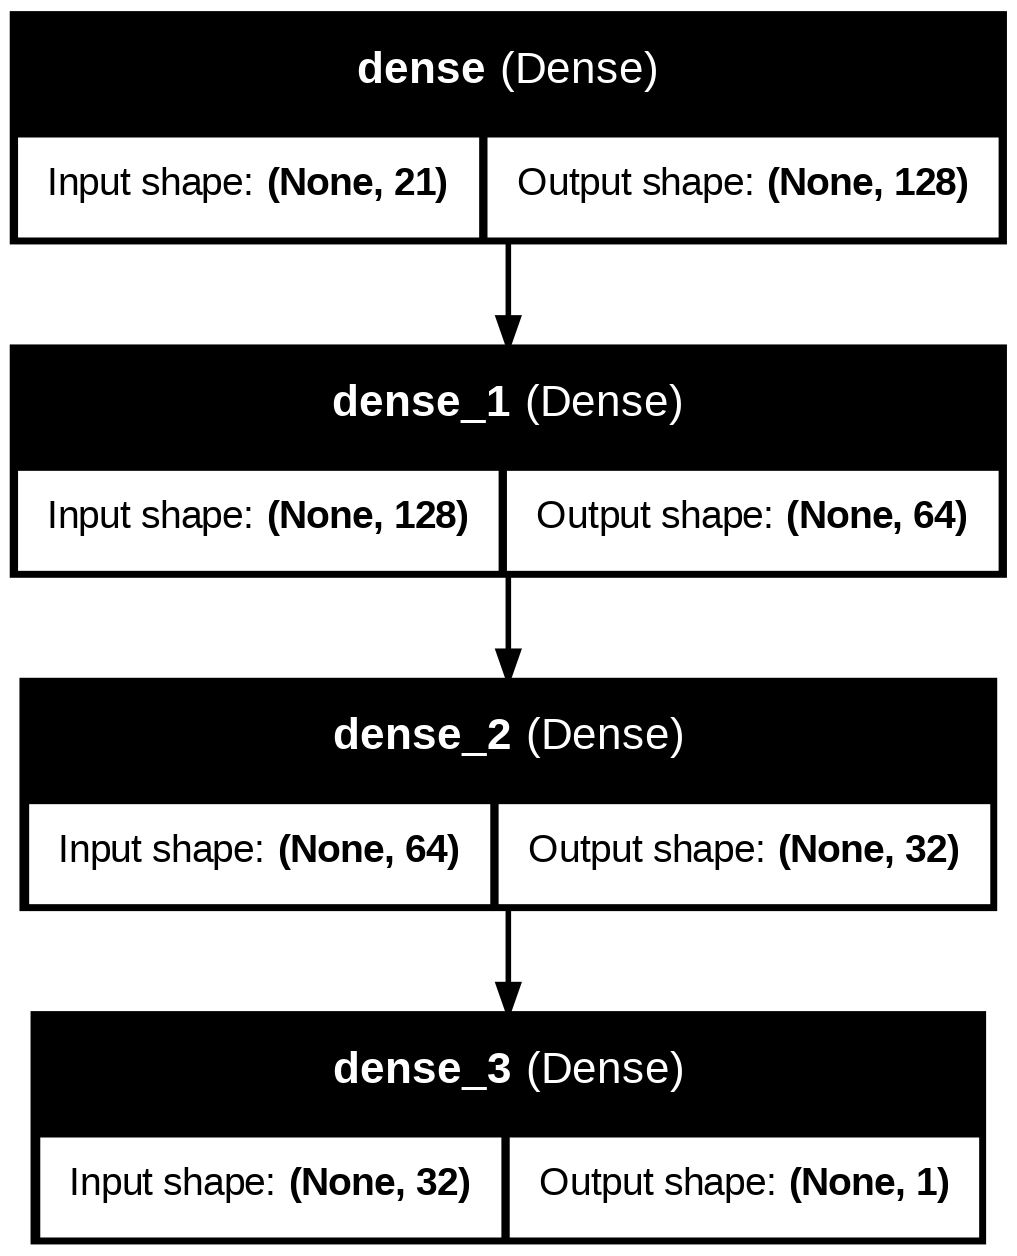

In [25]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

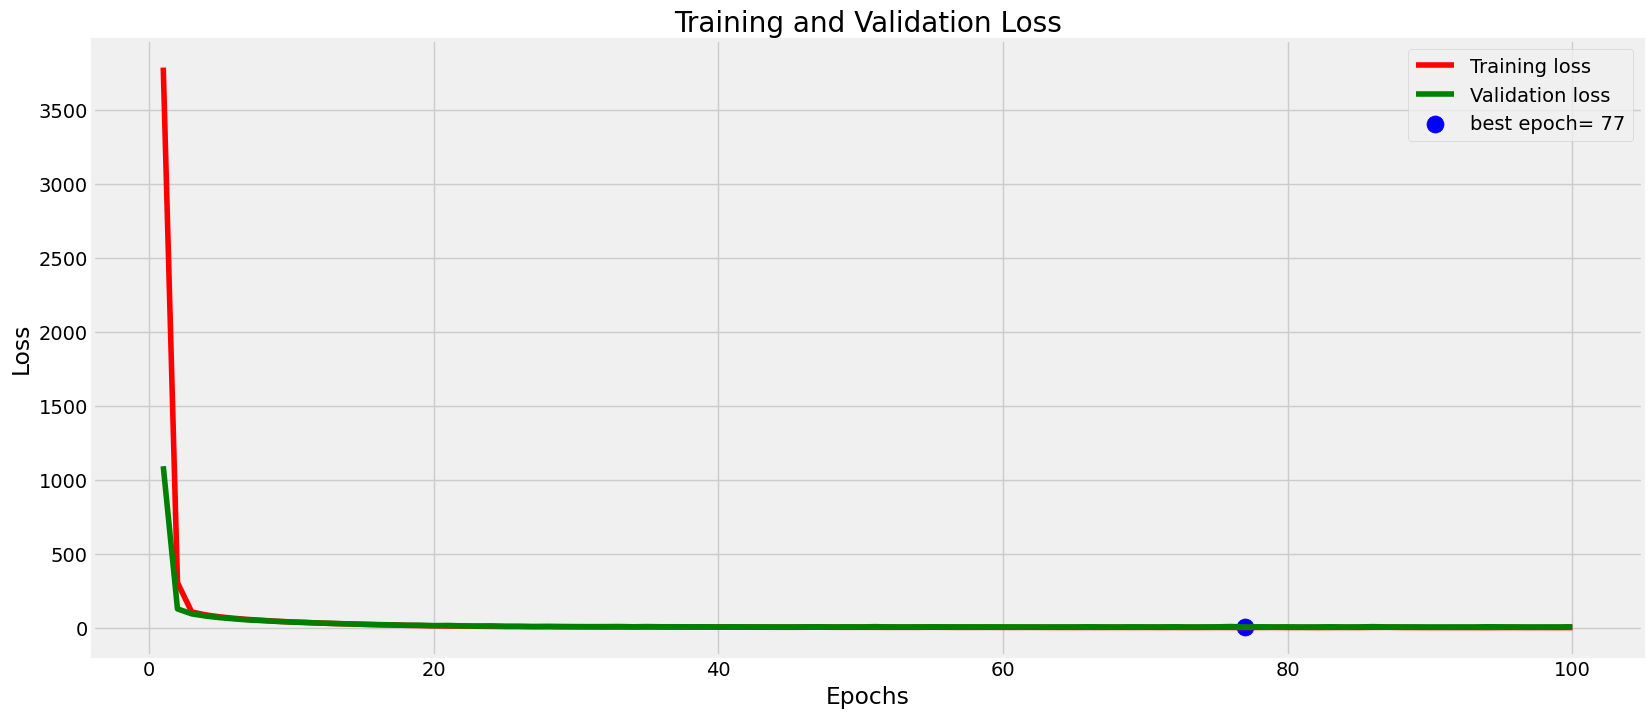

In [26]:
# Define needed variables
tr_loss = history.history['loss']
val_loss = history.history['val_loss']
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]

Epochs = [i+1 for i in range(len(tr_loss))]
loss_label = f'best epoch= {str(index_loss + 1)}'

# Plot training history
plt.figure(figsize= (20, 8))
plt.style.use('fivethirtyeight')

plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout
plt.show()

In [29]:
 history.history.keys()


dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])

In [30]:
mae = history.history['mae']

acc_loss_df = pd.DataFrame({"Mean Absolute error" : mae,
                            "Loss" : tr_loss,
                            "Epoch" : Epochs})

acc_loss_df.style.bar(color = '#84A9AC',
                      subset = ['Mean Absolute error','Loss'])

,Mean Absolute error,Loss,Epoch
0,59.852856,3787.383057,1
1,13.661635,305.901764,2
2,8.239938,108.141533,3
3,7.443405,87.734444,4
4,6.853921,74.592850,5
5,6.354047,64.894432,6
6,5.977847,57.044926,7
7,5.632237,51.144436,8
8,5.288644,45.110809,9
9,5.037936,40.745834,10


In [31]:
y_pred = model.predict(X_test)


19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step


In [33]:
y_pred

array([[74.840904],
       [76.07923 ],
       [76.10741 ],
       [77.81214 ],
       [48.785778],
       [57.32127 ],
       [72.24098 ],
       [77.20873 ],
       [80.41372 ],
       [58.875587],
       [50.227856],
       [55.76645 ],
       [58.25193 ],
       [76.311775],
       [69.79226 ],
       [62.766922],
       [54.452007],
       [80.91407 ],
       [70.07688 ],
       [84.44711 ],
       [80.46144 ],
       [86.09019 ],
       [73.1155  ],
       [69.67372 ],
       [76.10726 ],
       [69.82519 ],
       [54.787884],
       [68.17736 ],
       [85.15125 ],
       [74.13155 ],
       [69.67231 ],
       [75.49273 ],
       [72.395424],
       [71.73908 ],
       [79.21655 ],
       [47.250927],
       [63.533688],
       [74.900116],
       [65.748085],
       [73.94489 ],
       [55.381233],
       [59.89281 ],
       [76.95266 ],
       [80.54466 ],
       [74.770874],
       [52.44136 ],
       [80.72181 ],
       [76.15294 ],
       [63.562305],
       [78.56454 ],


In [32]:
R2 = r2_score(y_test, y_pred)
print("R2 Score=",R2 )

R2 Score= 0.9028106280150948
